In [ ]:
import numpy as np

v = [5.007, 4.994, 5.005, 4.990, 4.999]  # V
i = [19.663, 19.639, 19.640, 19.685, 19.678]  # mA

err_inst = 0.001

# TENSIÓN
# TIPO A
v_med = st.mean(v)
v_std = st.std(v)
v_u_i = st.u_i(v)

# TIPO B
v_semrng, v_neg_semrng, v_pos_semrng = st.semrng(v, err_inst=err_inst)
v_u_j = st.u_j(v, sem=v_semrng, k=3)

# CORRIENTE
# TIPO A
i_med = st.mean(i)
i_std = st.std(i)
i_u_i = st.u_i(i)

# TIPO B
i_semrng, i_neg_semrng, i_pos_semrng = st.semrng(i, err_inst=err_inst)
i_u_j = st.u_j(i, sem=i_semrng, k=3)

print(f"err_inst:{f'{err_inst*100:0.4f}':>10} %")

print(f"\nEVALUACIÓN TIPO A:")
st.fprint(title="v_u_i", value=v_u_i, unit="V")
st.fprint(title="i_u_i", value=i_u_i, unit="mA")

print(f"\nEVALUACIÓN TIPO B:")
st.fprint(title="v_u_i", value=v_u_j, unit="V")
st.fprint(title="i_u_i", value=i_u_j, unit="mA")

# INCERTIDUMBRE COMBINADA DE LA RESISTENCIA
r = np.corrcoef(v, i)
auto = r[0, 0]
r = r[0, 1]
print(f"r:      {f'{r:0.4f}':>10}")
print(f"auto:   {f'{auto}':>10}")
dr_dv = 1 / i_med
dr_di = -v_med / (i_med**2)

u_r = np.sqrt(
    (v_u_i * dr_di) ** 2
    + (i_u_i * dr_dv) ** 2
    + (i_u_j * dr_di) ** 2
    + (v_u_j * dr_dv) ** 2
    + (2 * dr_dv * dr_di * r * v_u_i * i_u_i)
)

print(f"\nINCERTIDUMBRE COMBINADA:")
print(f"u_r:      {f'{1000*u_r:0.4f}':>10} Ω")

R = 1000 * (v_med / i_med)
print(f"R:        {f'{R:0.4f}':>10} Ω")

# Como estoy trabajando con 4 distribuciones y los ui de las variables
# son menores a los uj considero k de expanción normal

# Con un 68% de confianza podemos decir que R = (254.2 +- 2.1) Ω
# Si queremos un 95.44% de confianza nos queda un R = (254.2 +- 4.2) Ω


# Ejercicio 1
Un laboratorio posee un voltímetro y un amperímetro calibrados. Con estos instrumentos se
quiere estimar el valor de una resistencia midiendo la tensión entre sus bornes y la corriente
eléctrica que circula a través de ésta, con el siguiente circuito:

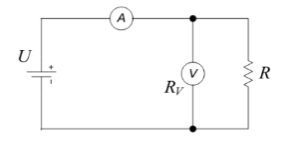

Además se sabe que el voltímetro es un instrumento digital de 5 ½ dígitos - rango 200 V -
exactitud declarada por el f abricante ±(0,05 % lectura + 2 dígitos)- resistencia interna (RV)
10MΩ (supongamos que se conoce con exactitud).
El amperímetro es un instrumento analógico de clase 0,2 – Alcance 150 mA – αMAX 150
divisiones y su resistencia interna (RA) 100 mΩ (supongamos que se conoce con exactitud). Se
toman 10 mediciones que se muestran en la siguiente tabla:

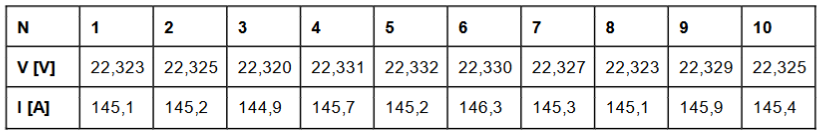

Se pide estimar el valor de R con una probabilidad de 95%


In [2]:
import numpy as np

---
##### INCERTIDUMBRE TIPO A

In [5]:
v = np.array([22.323, 22.325, 22.320, 22.331, 22.332, 22.330, 22.327, 22.323, 22.329, 22.325])  # V
i = np.array([145.1, 145.2, 144.9, 145.7, 145.2, 146.3, 145.3, 145.1, 145.9, 145.4])  # mA
r_v = 10e6

v_mean = np.mean(v)
v_std = np.std(v, ddof=1)
v_u_i = v_std / np.sqrt(len(v))

i_mean = np.mean(i)
i_std = np.std(i, ddof=1)
i_u_i = i_std / np.sqrt(len(i))

r_i = v_mean / i_mean

err_metodo = - r_i / r_v

print(v_mean, i_mean)
print(f'{r_i} kOhm {err_metodo} ')

22.3265 145.41000000000003
0.15354170964857985 kOhm -1.5354170964857984e-08 


---
##### INCERTIDUMBRE TIPO B

In [ ]:
def semrng(arr: list, err_inst: float = 0.0) -> list:
    arr_med = np.mean(arr)
    sem = arr_med * err_inst
    return (sem, arr_med - sem, arr_med + sem)

def u_j(arr: list, sem=0.0, k=1) -> float:
    return sem / np.sqrt(k)

# 5 ½ dígitos - rango 200 V -> 200.000 -> 0.001
# ±(0,05 % lectura + 2 dígitos) -> ±(0.05% + 0.002)

v_err_lectura = 0.0005
v_err_digitos = 0.002

err_inst = v_mean * v_err_lectura + v_err_digitos

v_semrng, v_neg_semrng, v_pos_semrng = semrng(v, err_inst=err_inst)
v_u_j = u_j(v, sem=v_semrng, k=3)

# TIPO B
i_semrng, i_neg_semrng, i_pos_semrng = semrng(i, err_inst=err_inst)
i_u_j = u_j(i, sem=i_semrng, k=3)

---
##### INCERTIDUMBRE COMBINADA

In [ ]:
def u_c(dfdx:float = 0.0, dfdy:float = 0.0, dfdz: float = 0.0, 
        ux: float = 0.0, uy: float = 0.0, uz: float = 0.0, 
        rxy: float = 0.0, rxz: float = 0.0, ryz: float = 0.0
    ) -> float:

    return np.sqrt(
                    ((dfdx * ux) ** 2 + (dfdy * uy) ** 2 + (dfdz * uz) ** 2)
                    + 2 * (
                        (dfdx * dfdy * ux * uy * rxy) 
                        + (dfdx * dfdz * ux * uz * rxz) 
                        + (dfdy * dfdz * uy * uz * ryz)
                    )
                )